## **Importing and viewing the data**

In [5]:
import pandas as pd 

#import the data 
df = pd.read_csv('Data/heart_data.csv')

#quick view 
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
#check how many rows and columns there are 
df.shape

(253680, 22)

In [12]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
#Let's check if there are any NA values 
na_counts = df.isna().sum()
print(na_counts)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [18]:
#Let's see the split in data between 0 and 1 
df.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

## **Exploratory Data Analysis**

In [23]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

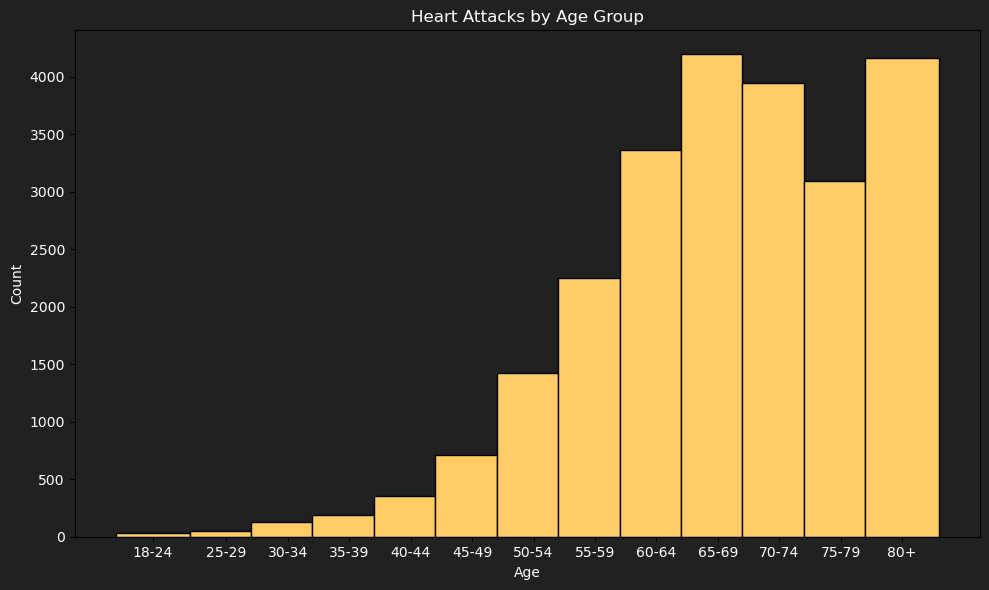

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

heart_attack_df = df[df['HeartDiseaseorAttack'] == 1]

# Create a mapping from age group (1-13) to the corresponding midpoints of the age ranges
age_bin_mapping = {
    1: 21,  # midpoint of 18-24
    2: 27,  # midpoint of 25-29
    3: 32,  # midpoint of 30-34
    4: 37,  # midpoint of 35-39
    5: 42,  # midpoint of 40-44
    6: 47,  # midpoint of 45-49
    7: 52,  # midpoint of 50-54
    8: 57,  # midpoint of 55-59
    9: 62,  # midpoint of 60-64
    10: 67, # midpoint of 65-69
    11: 72, # midpoint of 70-74
    12: 77, # midpoint of 75-79
    13: 82  # midpoint of 80+
}

plt.figure(figsize=(10,6))

plt.gca().set_facecolor('#212121') 
plt.gcf().set_facecolor('#212121') 

plt.hist(heart_attack_df['Age'].map(age_bin_mapping), bins=[18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 85], color='#ffcc66', edgecolor='black')

plt.title('Heart Attacks by Age Group', color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Count', color='white')

plt.xticks(ticks=[21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82], 
           labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 
           color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

plt.savefig('figures/heart_attacks_by_age.png', dpi=300, bbox_inches='tight')


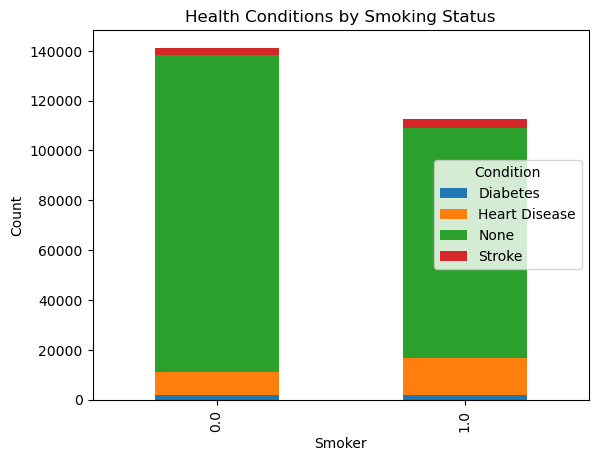

In [40]:
df['Condition'] = df.apply(lambda x: 'Heart Disease' if x['HeartDiseaseorAttack'] == 1 else
                                        ('Stroke' if x['Stroke'] == 1 else
                                         ('Diabetes' if x['Diabetes'] == 1 else 'None')), axis=1)

pd.crosstab(df['Smoker'], df['Condition']).plot(kind='bar', stacked=True)
plt.title('Health Conditions by Smoking Status')
plt.ylabel('Count')
plt.show()

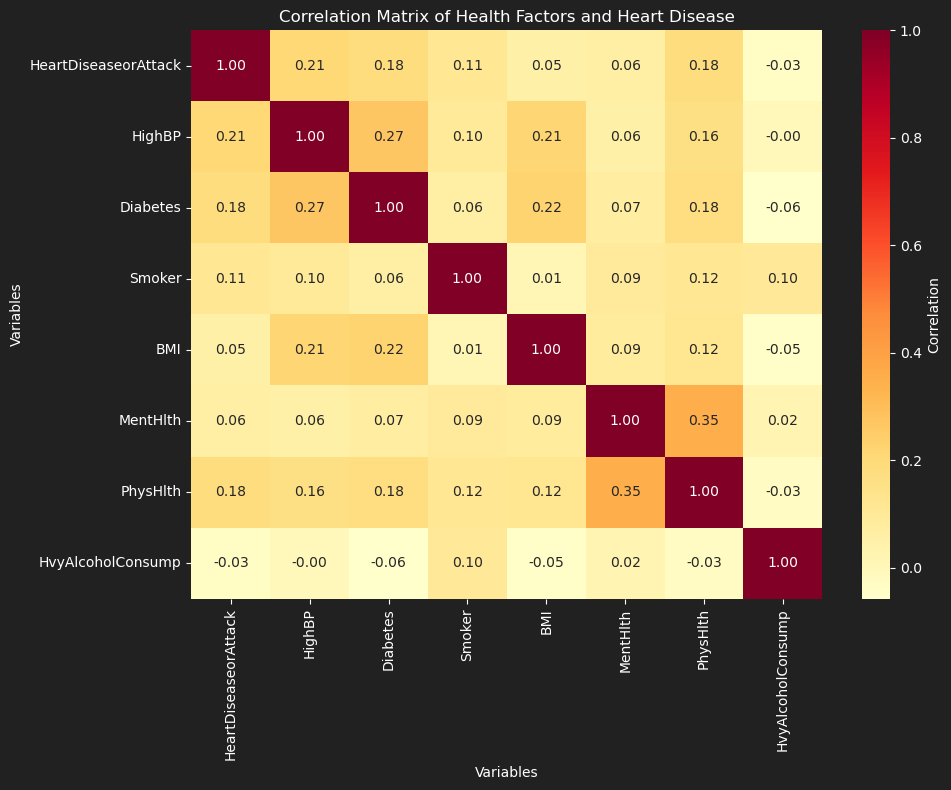

<Figure size 640x480 with 0 Axes>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = ['HeartDiseaseorAttack', 'HighBP', 'Diabetes', 'Smoker', 'BMI', 'MentHlth', 'PhysHlth', 'HvyAlcoholConsump']

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Correlation'})

plt.gcf().set_facecolor('#212121')  
ax.set_facecolor('#212121')  

plt.title('Correlation Matrix of Health Factors and Heart Disease', color='white')
plt.xlabel('Variables', color='white')
plt.ylabel('Variables', color='white')
ax.tick_params(colors='white')  
ax.figure.axes[-1].yaxis.label.set_color('white')  
ax.figure.axes[-1].tick_params(colors='white')  
plt.tight_layout()
plt.show()

plt.savefig('figures/correlation_matrix.png', dpi=300, bbox_inches='tight')



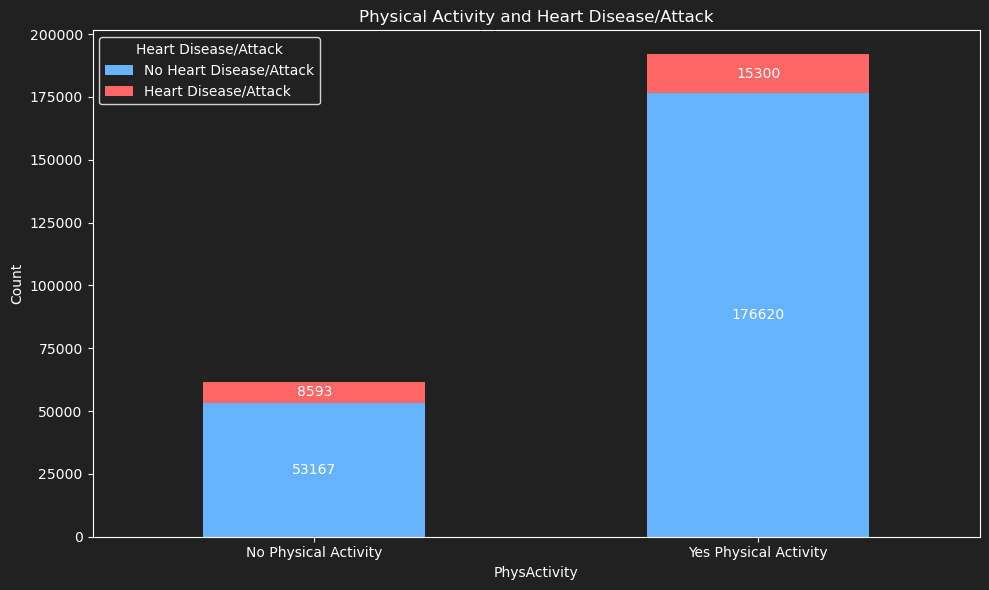

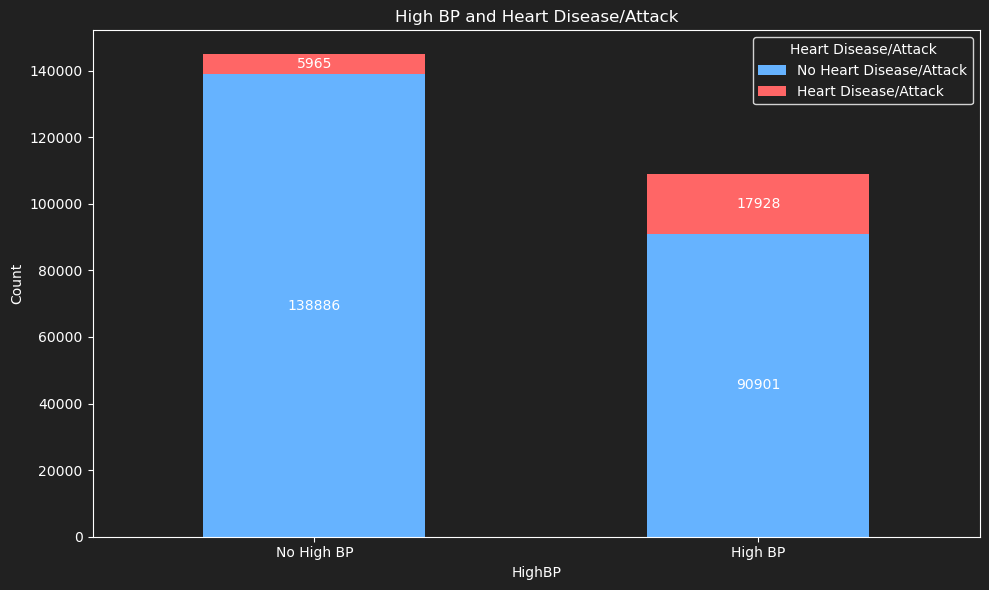

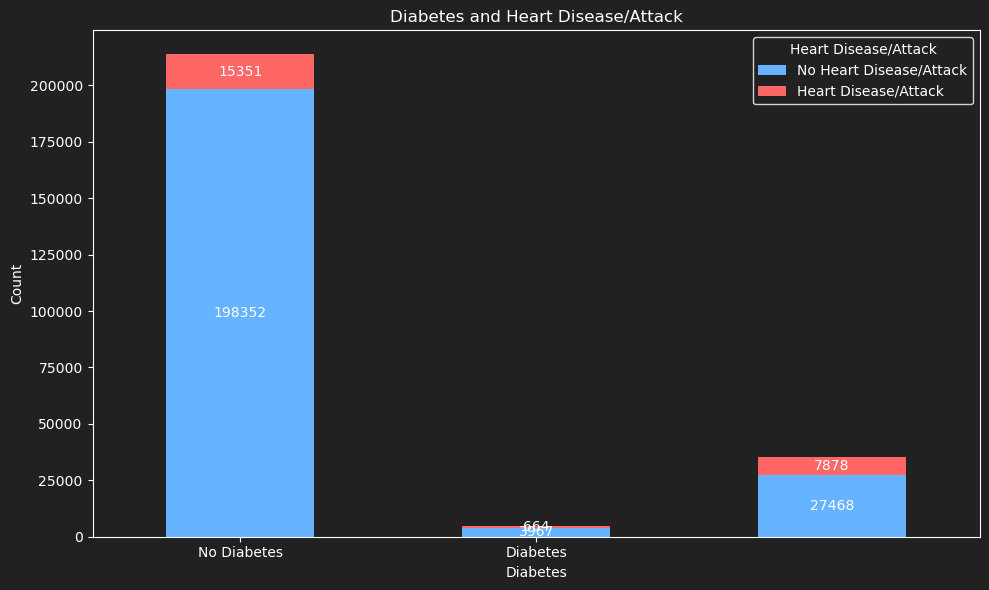

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def plot_stacked_bar_with_centered_counts(df, x_var, y_var, x_labels, title):
    crosstab = pd.crosstab(df[x_var], df[y_var])
    
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,6), color=['#66b3ff', '#ff6666'])
    
    plt.title(title, color='white')
    plt.xlabel(x_var.replace("_", " "), color='white')
    plt.ylabel('Count', color='white')
    plt.xticks([0, 1], x_labels, rotation=0, color='white')
    plt.yticks(color='white')
    plt.legend(['No Heart Disease/Attack', 'Heart Disease/Attack'], title='Heart Disease/Attack', facecolor='#212121', edgecolor='white')

    plt.gcf().set_facecolor('#212121')  # Set the figure background
    plt.gca().set_facecolor('#212121')  # Set the axes background

    for p in ax.patches:
        height = p.get_height()
        y_position = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., y_position), ha='center', va='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot 1: Physical Activity vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'PhysActivity', 'HeartDiseaseorAttack', ['No Physical Activity', 'Yes Physical Activity'], 'Physical Activity and Heart Disease/Attack')

# Plot 2: High BP vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'HighBP', 'HeartDiseaseorAttack', ['No High BP', 'High BP'], 'High BP and Heart Disease/Attack')

# Plot 3: Diabetes vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'Diabetes', 'HeartDiseaseorAttack', ['No Diabetes', 'Diabetes'], 'Diabetes and Heart Disease/Attack')

plt.savefig('figures/bar_plots.png', dpi=300, bbox_inches='tight')


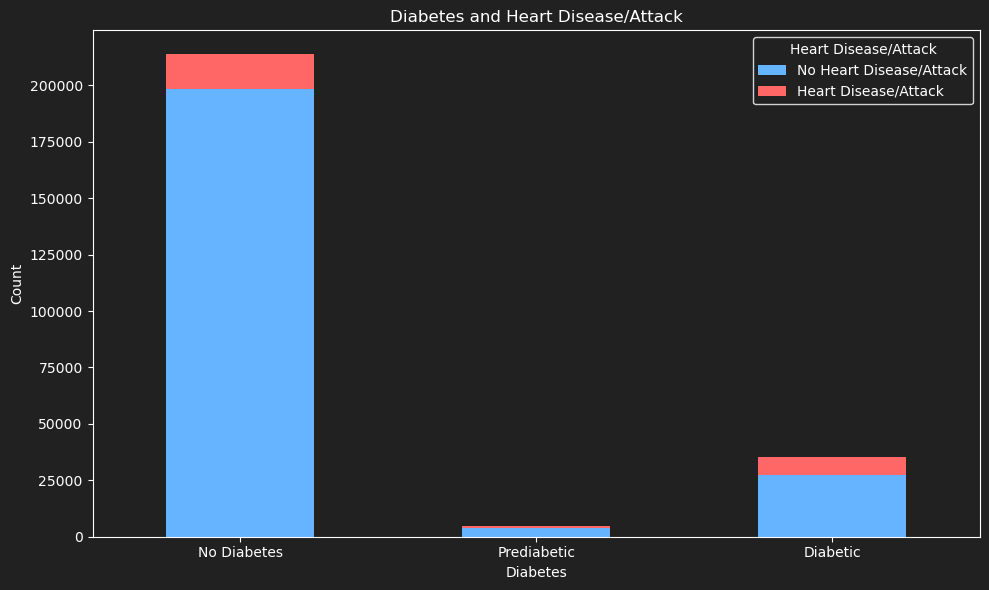

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def plot_stacked_bar(df, x_var, y_var, x_labels, title):
    crosstab = pd.crosstab(df[x_var], df[y_var])
    
    
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,6), color=['#66b3ff', '#ff6666'])
    
    
    plt.title(title, color='white')
    plt.xlabel(x_var.replace("_", " "), color='white')
    plt.ylabel('Count', color='white')
    plt.xticks([0, 1, 2], x_labels, rotation=0, color='white')
    plt.yticks(color='white')
    plt.legend(['No Heart Disease/Attack', 'Heart Disease/Attack'], title='Heart Disease/Attack', facecolor='#212121', edgecolor='white')

    # Set background color to #212121
    plt.gcf().set_facecolor('#212121')  
    plt.gca().set_facecolor('#212121')  

    plt.tight_layout()
    plt.show()

plot_stacked_bar(df, 'Diabetes', 'HeartDiseaseorAttack', ['No Diabetes', 'Prediabetic', 'Diabetic'], 'Diabetes and Heart Disease/Attack')

plt.savefig('figures/diabetes_bar.png', dpi=300, bbox_inches='tight')


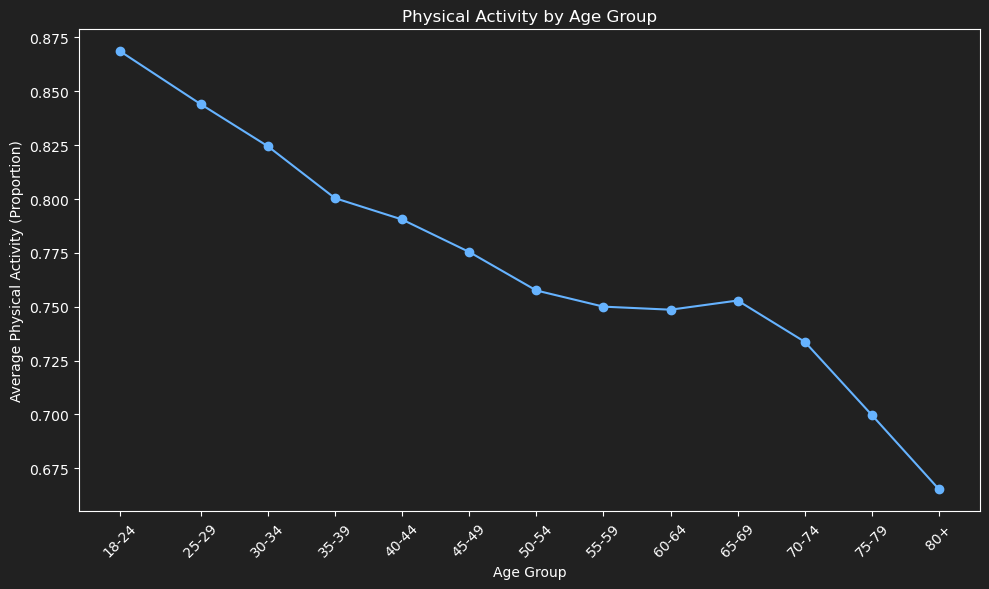

<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

age_bin_mapping = {
    1: 21,  # midpoint of 18-24
    2: 27,  # midpoint of 25-29
    3: 32,  # midpoint of 30-34
    4: 37,  # midpoint of 35-39
    5: 42,  # midpoint of 40-44
    6: 47,  # midpoint of 45-49
    7: 52,  # midpoint of 50-54
    8: 57,  # midpoint of 55-59
    9: 62,  # midpoint of 60-64
    10: 67, # midpoint of 65-69
    11: 72, # midpoint of 70-74
    12: 77, # midpoint of 75-79
    13: 82  # midpoint of 80+
}

df['Age_Mapped'] = df['Age'].map(age_bin_mapping)

phys_activity_by_age = df.groupby('Age_Mapped')['PhysActivity'].mean()

plt.figure(figsize=(10, 6))

plt.plot(phys_activity_by_age.index, phys_activity_by_age.values, marker='o', linestyle='-', color='#66b3ff')

plt.title('Physical Activity by Age Group', color='white')
plt.xlabel('Age Group', color='white')
plt.ylabel('Average Physical Activity (Proportion)', color='white')
plt.xticks(ticks=[21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82], 
           labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 
           color='white', rotation=45)
plt.yticks(color='white')

plt.gcf().set_facecolor('#212121')
plt.gca().set_facecolor('#212121')
plt.tight_layout()
plt.show()

plt.savefig('figures/physical_activity_by_age.png', dpi=300, bbox_inches='tight')


## **Splitting Data**

This section starts by seperating out the X and y variables. We then test a basic split, k-fold split and stratified split. The decided approach is the stratified split. 

In [12]:
# let's separate the feature matrix X, and target variable y
y = df['HeartDiseaseorAttack'] # remember, we want to predict who did or did not have a heart attack / disease 
X = df.loc[:, df.columns != 'HeartDiseaseorAttack'] # all other columns are features
print(y)
print(X.head())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0     1.0       1.0        1.0  40.0     1.0     0.0       0.0           0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0       0.0           1.0   
2     1.0       1.0        1.0  28.0     0.0     0.0       0.0           0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0       0.0           1.0   
4     1.0       1.0        1.0  24.0     0.0     0.0       0.0           1.0   

   Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0     0.0      1.0  ...            1.0          0.0      5.0      18.0   
1     0.0      0.0  ...            0.0          1.0      3.0       0.0   
2     1.0      0.0  ...            1.0          1.0      5.0      30.0   
3     1.0 

In [4]:
print(y.value_counts())

# ~ 9% of the data is in the 1st class so we have an imbalanced data set 

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split 
import numpy as np

y = df['HeartDiseaseorAttack'] 
X = df.loc[:, df.columns != 'HeartDiseaseorAttack'] 

random_state = 90

#X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
#X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

#print('**balance without stratification:**')
#print(np.unique(y_train,return_counts=True))
#print(np.unique(y_val,return_counts=True))
#print(np.unique(y_test,return_counts=True))

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
#print('**balance with stratification:**')
#print(np.unique(y_train,return_counts=True))
#print(np.unique(y_val,return_counts=True))
#print(np.unique(y_test,return_counts=True))